In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

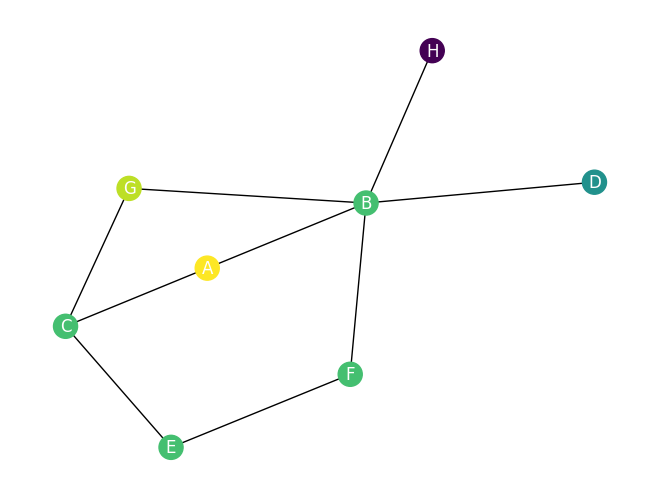

In [2]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5,
           'F': 0.7,
           'G': 0.9,
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

False
False


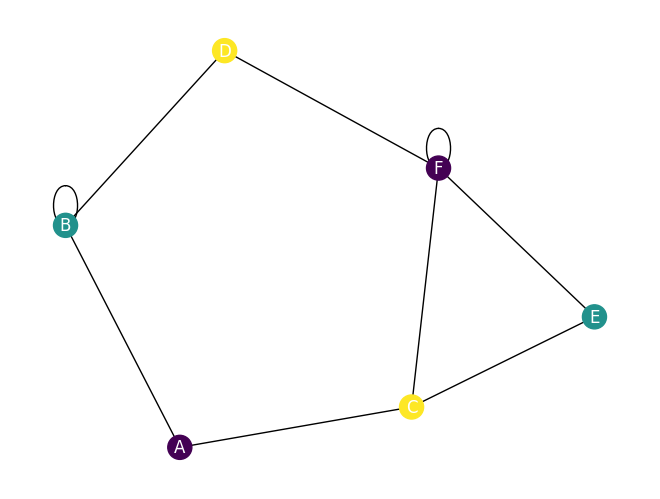

In [9]:
# G = nx.DiGraph() # for Laplacian Matrix u can not use the directed graph
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B','B'), ('F','F')]
)

val_map = {'A' : 1.0,
           'B' : 2.0,
           'C' : 3.0,
           'D' : 3.0,
           'E' : 2.0, 'F' : 1.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

print(nx.is_weighted(G))
print(nx.is_directed(G))

In [10]:
# Adjacency matrix
A = nx.adjacency_matrix(G)
A.data
print(A.todense())

[[0 1 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]
 [0 0 1 1 1 1]]


In [11]:
# diagonal matrix or degree matrix
A.setdiag(A.diagonal())
print(A.diagonal())

[0 1 0 0 0 1]


C:\Users\Aditya Prakash\AppData\Roaming\Python\Python311\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [12]:
# LAPLACIAN MATRIX L = D - A
L = nx.laplacian_matrix(G)
L.todense()

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2,  0, -1,  0,  0],
       [-1,  0,  3,  0, -1, -1],
       [ 0, -1,  0,  2,  0, -1],
       [ 0,  0, -1,  0,  2, -1],
       [ 0,  0, -1, -1, -1,  3]], dtype=int32)

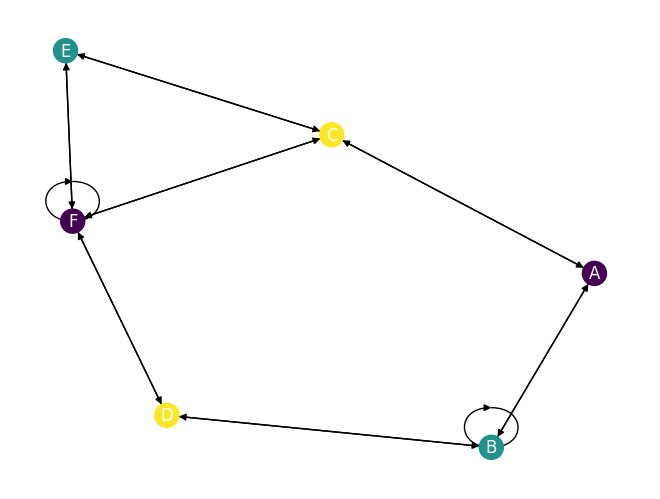

In [15]:
# Trick
nx.draw(G.to_directed(), cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')


In [16]:
I = nx.incidence_matrix(G)
I.todense()

array([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

In [18]:

edge_labels={('A', 'B'): 'e1',  ('A', 'C'): 'e2', ('C', 'E'): 'e3', ('E', 'F'): 'e4', ('C', 'F'): 'ef', ('B', 'D'): 'e6', ('D', 'F'): 'e7'
, ('B', 'B'): 'e8', ('F', 'F'): 'e9'
}
all_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
    ('E', 'F'), ('D', 'F'),
    ('B', 'B'), ('F', 'F')
    ]

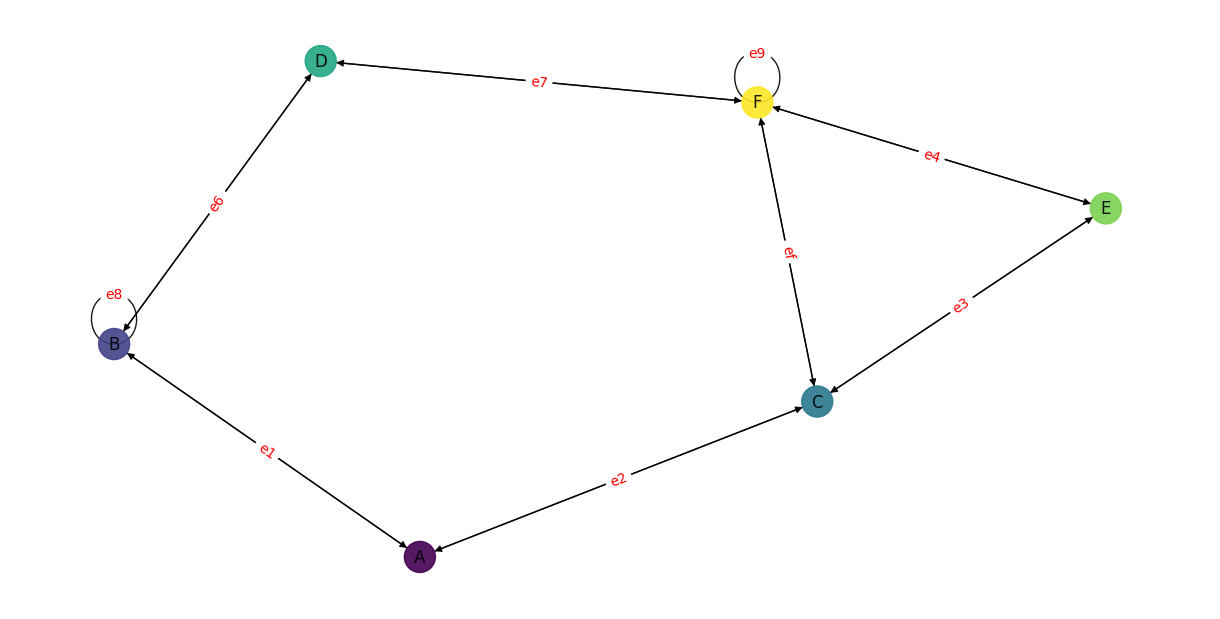

False
False


In [21]:
#G = nx.DiGraph() # for Laplacian Matrix you can not use the directed graph
G = nx.Graph() 
G.add_edges_from(all_edges)
    

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw(
    G.to_directed(), pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=values, alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [22]:
print(G.number_of_edges())
print(G.number_of_nodes())

9
6


In [23]:
nx.to_numpy_array(G.to_directed())

array([[0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1.]])

In [24]:
A = nx.adjacency_matrix(G)
A.todense()

array([[0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 1]], dtype=int32)

In [25]:
A.setdiag(A.diagonal())
print(A.diagonal())

[0 1 0 0 0 1]


C:\Users\Aditya Prakash\AppData\Roaming\Python\Python311\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [26]:
L = nx.laplacian_matrix(G)
L.todense()

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2,  0, -1,  0,  0],
       [-1,  0,  3,  0, -1, -1],
       [ 0, -1,  0,  2,  0, -1],
       [ 0,  0, -1,  0,  2, -1],
       [ 0,  0, -1, -1, -1,  3]], dtype=int32)

## Listing all adjacent nodes

In [27]:
# does not work properly so use next line
for line in nx.generate_adjlist(G):
    print(line)

A B C
B D B
C E F
D F
E F
F F


In [28]:
def get_adjanct_list_with_all_edges(graph_val) :
    for s, neighbours in graph_val.adjacency() :
        line = str(s) + ' : '
        for t, data in neighbours.items() :
            line += str(t) + ' - '
        yield line[ : -len(' ')]

In [29]:
for line in get_adjanct_list_with_all_edges(G):
    print(line)

A : B - C -
B : A - D - B -
C : A - E - F -
D : B - F -
E : C - F -
F : C - E - D - F -


In [30]:
I = nx.incidence_matrix(G)
I.todense()

array([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

In [31]:
G.degree()

DegreeView({'A': 2, 'B': 4, 'C': 3, 'D': 2, 'E': 2, 'F': 5})

In [32]:
L = nx.laplacian_matrix(G)
L.todense()

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2,  0, -1,  0,  0],
       [-1,  0,  3,  0, -1, -1],
       [ 0, -1,  0,  2,  0, -1],
       [ 0,  0, -1,  0,  2, -1],
       [ 0,  0, -1, -1, -1,  3]], dtype=int32)

## Random Walk

In [39]:
import random
def get_randomwalk(graph_val, node, path_length) :
    random_walk = [node]

    for i in range(path_length-1):
        temp = list(graph_val.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node

    return random_walk

In [40]:
get_randomwalk(G,'A',2)

['A', 'C']

In [41]:
from tqdm import tqdm

In [43]:
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(1):
        random_walks.append(get_randomwalk(G,n,i))

#count of sequences
len(random_walks)

100%|██████████| 6/6 [00:00<?, ?it/s]


6